# Feuille de travaux pratiques. Formules de quadrature

In [1]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (ordre de convergence de formules de quadrature composées)
Soit $f$ une fonction réelle continue sur un intervalle $[a,b]$. Le but de cet exercice est de mesurer l'efficacité de [formules de quadrature de Newton-Cotes](https://fr.wikipedia.org/wiki/Formule_de_Newton-Cotes) composées classiques pour l'approximation de l'intégrale définie
$$
I(f)=\int_a^b f(x)\,\mathrm{d}x,
$$
pour différents choix fonction. En particulier, on souhaite observer l'influence de la régularité de la fonction sur la précision des formules.

**1.** Écrire trois fonctions, ayant chacune pour paramètres d'entrée la fonction $f$, les bornes $a$ et $b$ de l'intervalle, et un nombre entier non nul $m$ de subdivisions de l'intervalle, calculant une approximation $I_{m,n}(f)$ de $I(f)$ respectivement par les formules de quadrature de la [règle du point milieu](http://fr.wikipedia.org/wiki/M%C3%A9thode_du_point_m%C3%A9dian) (formule ouverte, $n=0$), de la [règle du trapèze](http://fr.wikipedia.org/wiki/M%C3%A9thode_des_trap%C3%A8zes) (formule fermée, $n=1$) et de la [règle de Simpson](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_Simpson) (formule fermée, $n=2$) composées.

In [2]:
def midPoint(f,a,b,m):
    res=0
    for i in range(m):
        res+=auxMidPoint(f, a+i*(b-a)/m, a+(i+1)*(b-a)/m)
    return res

def trapeze(f,a,b,m):
    res=0
    for i in range(m):
        res+=auxTrapeze(f, a+i*(b-a)/m, a+(i+1)*(b-a)/m)
    return res

def simpson(f,a,b,m):
    res=0
    for i in range(m):
        res+=auxSimpson(f, a+i*(b-a)/m, a+(i+1)*(b-a)/m)
    return res

def auxMidPoint(f,a,b):
    return (b-a)*f((a+b)/2)

def auxTrapeze(f,a,b):
    c=(f(b)+f(a))*(b-a)/2
    return c

def auxSimpson(f,a,b):
    c=f(a)+f(b)+4*f((a+b)/2)
    return c*(b-a)/6

**2.** Au moyen de la commande `semilogy`, tracer le graphe des courbes de l'erreur $\vert I(f)-I_{m,n}(f)\vert$ de chacune de ces trois formules en fonction du nombre de sous-intervalles pour $f(x)=e^x$, $a=0$ et $b=1$. Commenter les résultats.

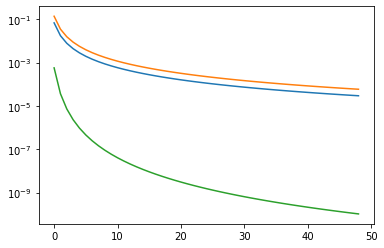

In [3]:
a=0
b=1
f=np.exp
I=np.exp(1)-1

x0=[]
x1=[]
x2=[]
for i in range(1,50):
    x0.append(abs(midPoint(f,a,b,i)-I))
    x1.append(abs(trapeze(f,a,b,i)-I))
    x2.append(abs(simpson(f,a,b,i)-I))
plt.semilogy(x0)
plt.semilogy(x1)
plt.semilogy(x2)

**3.** Reprendre la question précédente pour $f(x)=\vert 3\,x^4-1\vert$, $a=0$ et $b=1$. Que constate-t-on? Comment procéder pour retrouver les ordres de convergence théoriques des formules dans ce cas?

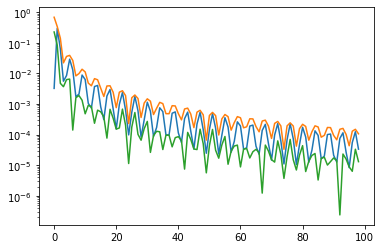

In [4]:
def f(x):
    return abs(3*x**4-1)
a=0
b=1
I=1.6*(3**(-1/4))-0.4

x0=[]
x1=[]
x2=[]
for i in range(1,100):
    x0.append(abs(midPoint(f,a,b,i)-I))
    x1.append(abs(trapeze(f,a,b,i)-I))
    x2.append(abs(simpson(f,a,b,i)-I))
plt.semilogy(x0)
plt.semilogy(x1)
plt.semilogy(x2)

## Exercice bonus (méthode de Romberg)

On considère l'utilisation de la règle du trapèze composée associée à une subdivision dyadique de l'intervalle $[a,b]$ pour le calcul de l'intégrale $I(f)$ de
l'exercice précédent. En supposant la fonction $f$ suffisamment régulière et en posant $H=\frac{b-a}{2^k}$, avec $k$ un entier naturel.

On peut montrer à partir de la [formule d'Euler-Maclaurin](https://fr.wikipedia.org/wiki/Formule_d%27Euler-Maclaurin) que l'erreur vérifie
$$
I(f)-I_{2^k,1}(f)=c_1\,H^2+c_2\,H^4+\dots,
$$
où les coefficients $c_k$ ne dépendent pas de $H$ et où seules les puissances paires apparaissent dans le développement. On peut exploiter cette propriété pour supprimer un à un les termes du développement, et ainsi obtenir de meilleures approximations de l'intégrale $I(f)$.

Posons $R_{k,0}=I_{2^k,1}(f)$. À partir d'une estimation de l'intégrale pour une subdivision de taille $\frac{H}{2}$, notée $R_{k+1,0}(=I_{2^{k+1},1}(f))$, l'utilisation du [procédé d'extrapolation de Richardson](https://fr.wikipedia.org/wiki/Extrapolation_de_Richardson) permet d'éliminer le premier terme du développement en considérant l'approximation fournie par la quantité
$$
R_{k+1,1}=R_{k+1,0}+\frac{1}{3}(R_{k+1,0}-R_{k,0})=\frac{1}{3}(4\,R_{k+1,0}-R_{k,0}),
$$
conduisant ainsi à une erreur d'ordre quatre en $H$.

Le procédé appelé [méthode de Romberg](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Romberg) pour l'évaluation approchée de $I(f)$ consiste en l'application répétée de cette opération à partir de la valeur $k=0$.

**1.** Écrire une fonction `romberg`, ayant pour arguments d'entrée une fonction $f$, les bornes $a$ et $b$ de l'intervalle, un nombre d'extrapolations maximal $N$ et une tolérance $\varepsilon$, renvoyant la valeur de l'approximation $R_{k,k}$ telle que $|R_{k,k}-R_{k-1,k-1}|\leq\varepsilon$, avec $0\leq k\leq N$, ou bien $k=N$. Pour cela, on construira un tableau contenant les valeurs extrapolées $R_{k,m}$, $0\leq m\leq k\leq N$, dont les éléments satisfont la relation de récurrence
$$
R_{k,m}=R_{k,m-1}+\frac{1}{4^m-1}\left(R_{k,m-1}-R_{k-1,m-1}\right),\ 1\leq m\leq k\leq N.
$$
Les approximations successives de $R_{k,k}$ construites par la méthode de Romberg se trouvent alors sur la diagonale du tableau et les éléments de la première colonne du tableau sont tels que $R_{k,0}=I_{2^k,1}(f)$, $k=0,\dots,N$.

In [5]:
def R(f,a,b,k,n):
    if n==0:
        return trapeze(f,a,b,2**k)
    if k>=N:
        return 0
    c=R(f,a,b,k,n-1)
    return c+(c-R(f,a,b,k-1,n-1))/(4**n-1)

def romberg(f,a,b,N,eps):
    rk=rk_1=trapeze(f,a,b,1)
    for k in range(1,N+1):
        rk=R(f,a,b,k,k)
        err=abs(rk-rk_1)
        if err <= eps:
            return rk
        rk_1=rk
    return rk



**2.** Utiliser cette fonction pour calculer des approximations de l'intégrale $I(f)$ dans les cas suivants :
* $f(x)=x^3$, $a=0$, $b=1$,
* $f(x)=\frac{1}{x}$, $a=1$, $b=2$,
* $f(x)=\sin(x)$, $a=0$, $b=\pi$,
* $f(x)=x\sin(\sqrt{x})$, $a=0$, $b=3$,
* $f(x)=e^{-x^2}$, $a=0$, $b=1$.

In [6]:
N=100
eps=10**(-6)

def f1(x):
    return x**3

a=0
b=1
print(romberg(f1,a,b,N,eps)) #donne 1/4

def f2(x):
    return 1/x

a=1
b=2
print(romberg(f2,a,b,N,eps)) #donne ln(2)

def f3(x):
    return np.sin(x)

a=0
b=np.pi
print(romberg(f3,a,b,N,eps)) #donne 2

def f4(x):
    return x*np.sin(x**(1/2))

a=0
b=3
print(romberg(f4,a,b,N,eps)) #donne environ 4.2536 (source : wolfram alpha)

def f5(x):
    return np.exp(-x*x)

a=0
b=1
print(romberg(f5,a,b,N,eps)) #donne environ 0.7468 (source : wolfram alpha)

0.25
0.6931471819167452
2.0000000000013216e+00
4.253607506684712
7.468241330950942e-01
